## Sub-task 1: Unsupervised Learning

In [2]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Read the data from the CSV file
df = pd.read_csv(r"dataset\cluster1.csv", header=None, names=['x', 'y'])

# Check the number of data points in the data set
print("Data Points", len(df))


Data Points 600


In [3]:
df.head()

,x,y
0,-1.99360,-1.4564
1,0.91893,-1.3925
2,1.44620,-3.1794
3,0.39093,-1.5674
4,2.69920,-5.1001


In [4]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=73)
df['cluster'] = kmeans.fit_predict(df[['x', 'y']])
df

,x,y,cluster
0,-1.993600,-1.4564,2
1,0.918930,-1.3925,2
2,1.446200,-3.1794,1
3,0.390930,-1.5674,2
4,2.699200,-5.1001,1
...,...,...,...
595,-0.935660,-1.3848,2
596,2.701200,-3.7438,1
597,-0.852540,-1.5795,2
598,0.044536,-1.6157,2


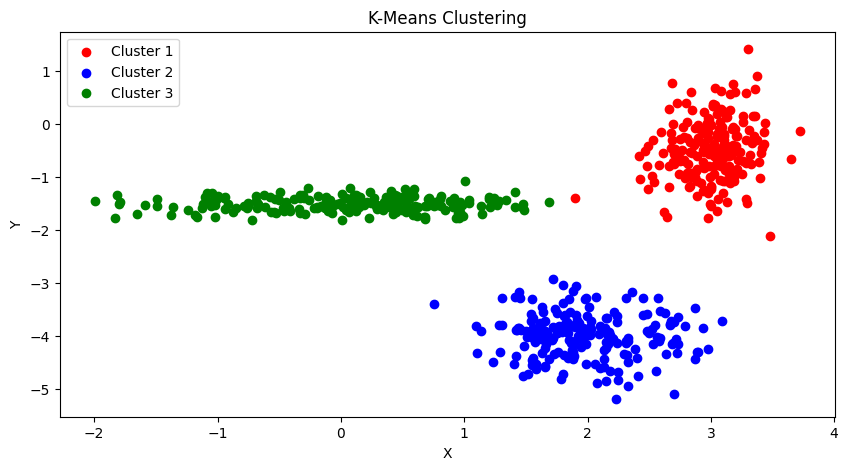

In [8]:
# Plot the resulting clusters
plt.figure(figsize=(10, 5))
colors = ['red', 'blue', 'green']
for cluster in range(3):
    clustered_data = df[df['cluster'] == cluster]
    plt.scatter(clustered_data['x'], clustered_data['y'], c=colors[cluster], label=f'Cluster {cluster + 1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

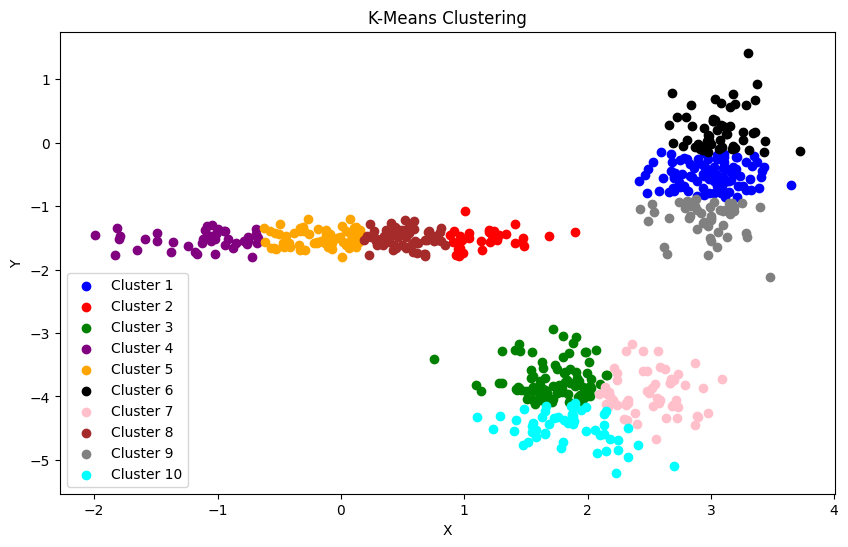

In [11]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['x', 'y']])


# Plot the resulting clusters
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'black', 'pink', 'brown', 'gray', 'cyan']
for cluster in range(10):
    clustered_data = df[df['cluster'] == cluster]
    plt.scatter(clustered_data['x'], clustered_data['y'], c=colors[cluster], label=f'Cluster {cluster + 1}')

# Plot cluster centers
# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='yellow', marker='X', s=200, label='Centroids')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

I disagree with the conclusion of my colleague based only on the reconstruction error. Although the reconstruction error decreases as the number of clusters increases, it does not mean that more clusters are better.

The first reason is overfitting, as shown above, where each cluster captures noise instead of meaningful patterns. The second reason is that the results can be hard to interpret when there are a large number of clusters.

A common heuristic method for determining the optimal number of clusters is the elbow method, which denotes a point at which further increases are not significantly lowering the error. It balances the reduction in error with simplicity.

Domain knowledge also matters. For example, if the data is talking about segments of customers, too many segments might be intractable for business strategy.

So although the error is lower with 10 clusters, it doesn't mean this is the best number. Other parameters should be taken into account in order to figure out the best number of clusters.
